# Libararies and Data 

In [68]:
# import libararies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
# from sklearn.metrics import pairwise_distances
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# from sklearn.svm import OneClassSVM
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')
import os
path = os.getcwd()
pd.set_option("max_columns",0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv('./csv/df_total.csv')

In [70]:
df.head()

,Unnamed: 0,ID,TARGET,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME,AMT_APP,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DOCUMENT_3,DOCUMENT_6,DOCUMENT_13,DOCUMENT_14,DOCUMENT_16,PHONE_CHANGE,TYPE_HOUSE:House,TYPE_HOUSE:Municipal,TYPE_HOUSE:Rented,TYPE_HOUSE:Parents,REGION_RATING:A,REGION_RATING:B,REGION_RATING:C,TYPE_INCOME:Associate,TYPE_INCOME:Pensioner,TYPE_INCOME:Unemployed,TYPE_INCOME:Working,TYPE_EDUCATIOM:Higher,TYPE_EDUCATIOM:Incomplete,TYPE_EDUCATIOM:Secondary,FAMILY_STATUS:Married,FAMILY_STATUS:Widow,FAMILY_STATUS:Single,BU_NUM_LOAN,BU_SUM_LOAN,BU_SUM_OPEN_DEBT,BU_MEAN_DELAY,BU_PER_ACCTIVE,BU_PER_CLOSED,HC_NUM_APP,HC_MEAN_AMT_APP,HC_MEAN_PER_AMT_APPROVAL,HC_PER_ACCTIVE,HC_PER_CLOSED,HC_PER_DEBT,HC_MEAN_PER_DOWN,HC_MEAN_ANNUITY,HC_MEAN_NUM_INST,HC_MEAN_AMT_INST,HC_MEAN_DELAY_INST,HC_MEAN_AMT_DIFF_INST,HC_PER_UNPAID_INST
0,0,100002,1,0,1,0,0,202500,406597,24700,-9461,-637,1,0,0,0,0,-1134,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,8,865055,245781,157,0.25,0.75,1,179055,1.00,1.00,0.00,0.0,0.00,9251,19,11559,0,-20,0.0
1,1,100003,0,1,1,1,0,270000,1293502,35698,-16765,-1188,1,0,0,0,0,-828,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,4,1017400,0,-25,0.25,0.75,3,435436,1.06,0.33,0.67,0.0,0.05,56553,8,64755,0,-7,0.0
2,2,100004,0,0,0,0,0,67500,135000,6750,-19046,-225,0,0,0,0,0,-815,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,2,189037,0,44,0.00,1.00,1,24282,0.83,0.00,1.00,0.0,0.21,5357,3,7096,0,-8,0.0
3,3,100007,0,0,1,0,0,121500,513000,21865,-19932,-3038,0,0,0,0,0,-1106,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,146250,0,0,0.00,1.00,5,135636,1.00,0.40,0.60,0.0,0.16,12132,13,12214,-452,-4,0.0
4,4,100008,0,0,1,0,0,99000,490495,27517,-16941,-1588,1,0,0,0,0,-2536,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,3,468445,240057,57,0.33,0.67,4,194627,0.98,0.00,1.00,0.0,0.07,15839,8,27361,-342,26,0.0


In [71]:
df=df.drop(columns=['Unnamed: 0'])

In [72]:
df=df.set_index('ID')

# DBSCAN

## Columns Types

In [73]:
# 25 columns
col_bin = ['GENDER', 'OWN_CAR', 'OWN_REALTY',
               'DOCUMENT_3', 'DOCUMENT_6', 'DOCUMENT_13', 'DOCUMENT_14', 'DOCUMENT_16',
               'TYPE_HOUSE:House', 'TYPE_HOUSE:Municipal', 'TYPE_HOUSE:Rented', 'TYPE_HOUSE:Parents',
               'REGION_RATING:A', 'REGION_RATING:B', 'REGION_RATING:C',
               'TYPE_INCOME:Associate', 'TYPE_INCOME:Pensioner', 'TYPE_INCOME:Unemployed',
               'TYPE_INCOME:Working', 
               'TYPE_EDUCATIOM:Higher', 'TYPE_EDUCATIOM:Incomplete', 'TYPE_EDUCATIOM:Secondary', 
               'FAMILY_STATUS:Married', 'FAMILY_STATUS:Widow', 'FAMILY_STATUS:Single']

In [74]:
#  Do scaling beafore using DBSACN and Heatmap Correlation!!
# 8 columns
col_per = ['BU_PER_ACCTIVE', 'BU_PER_CLOSED', 'HC_MEAN_PER_AMT_APPROVAL', 'HC_PER_ACCTIVE', 'HC_PER_CLOSED', 
           'HC_PER_DEBT', 'HC_MEAN_PER_DOWN', 'HC_PER_UNPAID_INST']

In [75]:
#  Do scaling beafore using DBSCAN and Heatmap Correlation!!
# 18 columns
col_amt = ['CNT_CHILDREN', 'AMT_INCOME', 'AMT_APP', 'AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'PHONE_CHANGE',
           'BU_NUM_LOAN', 'BU_SUM_LOAN', 'BU_SUM_OPEN_DEBT', 'BU_MEAN_DELAY', 'HC_NUM_APP', 'HC_MEAN_AMT_APP',
           'HC_MEAN_ANNUITY', 'HC_MEAN_NUM_INST', 'HC_MEAN_AMT_INST', 'HC_MEAN_DELAY_INST', 'HC_MEAN_AMT_DIFF_INST']

## Binary Type:

In [ ]:
# # Society: (12)
# col_society = ['OWN_CAR','OWN_REALTY',
#                'TYPE_HOUSE:Municipal', 
#                'REGION_RATING:A', 'REGION_RATING:B', 'REGION_RATING:C',
#                'TYPE_INCOME:Associate', 'TYPE_INCOME:Unemployed',
#                'TYPE_INCOME:Working', 
#                'TYPE_EDUCATIOM:Higher', 'TYPE_EDUCATIOM:Incomplete',
#                'TYPE_EDUCATIOM:Secondary']

In [ ]:
# # Type of Age:
# col_age = ['OWN_CAR','OWN_REALTY',
#                'TYPE_HOUSE:House',
#                'TYPE_INCOME:Associate', 'TYPE_INCOME:Pensioner', 'TYPE_INCOME:Unemployed',
#                'TYPE_INCOME:Working', 'TYPE_EDUCATIOM:Higher', 'TYPE_EDUCATIOM:Incomplete',
#                'TYPE_EDUCATIOM:Secondary', 'FAMILY_STATUS:Married', 'FAMILY_STATUS:Widow',
#                'FAMILY_STATUS:Single']

In [ ]:
def DBSCAN_bin_table(df, col_clus, n_sumple=10000, clus_eps=0.1, clus_min_sample=20):
  # clustering:
  df_col=df.filter(col_clus , axis=1)
  df_clus = df_col.sample(n=n_sumple, random_state=123456)
  df_clus['cluster'] = DBSCAN(eps=clus_eps, min_samples=clus_min_sample, metric= 'hamming').fit_predict(df_clus)

  # Table for interpretation:
  d_num = dict(df_clus['cluster'].value_counts())
  clus = list(d_num.keys())
  df_per = pd.DataFrame(index = ['clus_num']+col_clus, columns = clus)
  for i in col_clus:
    for j in clus:
      d = dict(df_clus[df_clus['cluster'] == j ][i].value_counts())
      # print(d.keys())
      df_per.loc['clus_num',j] = d_num[j]
      if len(d) == 2:
        p = (d[1]/(d[0]+d[1])).round(2)
        df_per.loc[i,j] = p
      elif 0 in d.keys():
        df_per.loc[i,j] = 0.0
      elif 1 in d.keys():
        df_per.loc[i,j] = 1.0
        
  return(df_per) 

In [ ]:
df_per_society = DBSCAN_bin_table(df=df, col_clus=col_society, n_sumple=10000, clus_eps=0.1, clus_min_sample=20)

In [ ]:
df_per_society

,0,4,3,6,5,7,1,8,2,-1
clus_num,5524,1793,1043,664,328,312,243,51,27,15
OWN_CAR,0.68,0.58,0.7,0.68,0.57,0.55,0.62,0.65,0.89,0.33
OWN_REALTY,0.29,0.28,0.32,0.31,0.29,0.3,0.37,0.33,0.11,0.8
TYPE_HOUSE:Municipal,0.03,0.02,0.03,0.13,0.01,0.07,0.02,0.02,0.0,0.27
REGION_RATING:A,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.27
REGION_RATING:B,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
REGION_RATING:C,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.73
TYPE_INCOME:Associate,0.18,0.28,0.15,0.39,0.23,0.46,0.33,0.51,0.26,0.53
TYPE_INCOME:Unemployed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TYPE_INCOME:Working,0.6,0.61,0.63,0.47,0.66,0.42,0.64,0.47,0.67,0.47


## Numeric Type:

In [76]:
def DBSCAN_num_plot(df, col_clus, scaler, clus_metric, pp_col, n_sumple=10000, clus_eps=0.1, clus_min_sample=20):
  # Scaling:
  df = df.filter(col_clus,axis=1)
  df_sc = scaler.fit_transform(df)
  df = pd.DataFrame(df_sc, columns = col_clus, index = df.index)

  # clustering:
  df_clus = df.sample(n=n_sumple, random_state=123456)
  df_clus['cluster'] = DBSCAN(eps=clus_eps, min_samples=clus_min_sample, metric= clus_metric).fit_predict(df_clus)
  print(df_clus['cluster'].value_counts())
  pp_col = list(pp_col) + [-1]
  sns.pairplot(df_clus[df_clus.columns[pp_col]], hue='cluster')
  # sns.pairplot(df_clus, hue='cluster')
  return(df_clus)


 0    9508
-1     475
 1       6
 2       6
 3       5
Name: cluster, dtype: int64


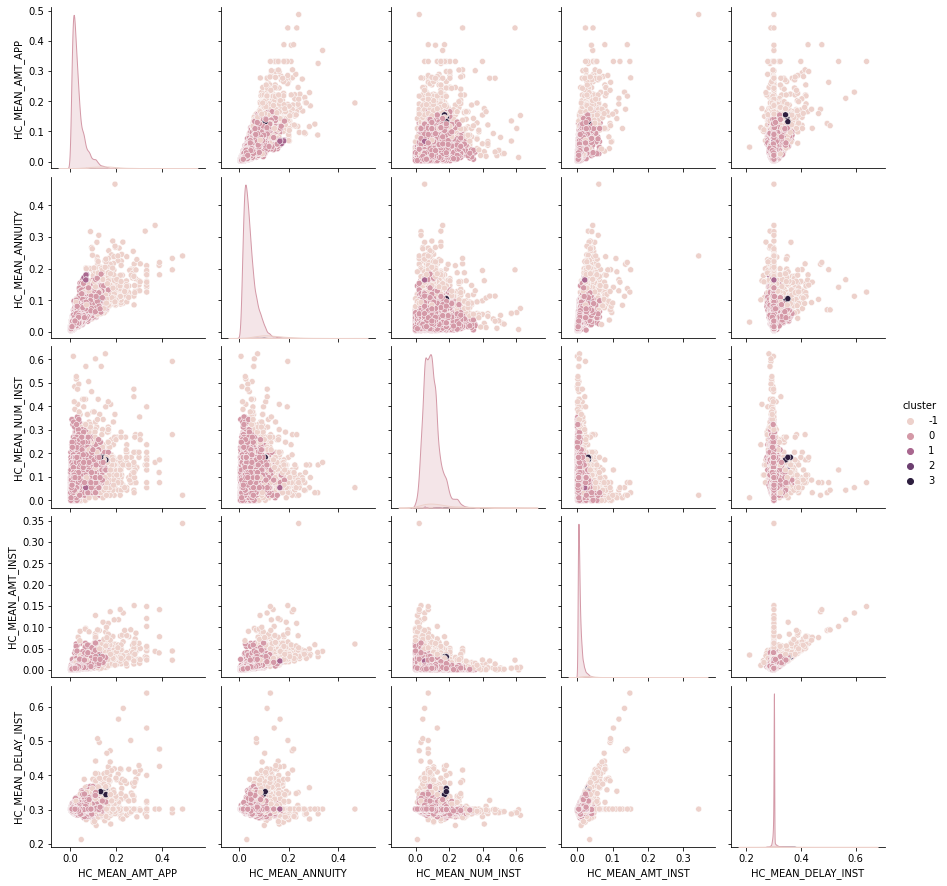

In [98]:
scalerMM = MinMaxScaler()
df_per_num = DBSCAN_num_plot(df=df, col_clus=col_amt[12:17], scaler=scalerMM,  clus_metric = 'euclidean',
                             pp_col = np.arange(5),
                             n_sumple=10000, clus_eps=0.02, clus_min_sample=5)